In [1]:
suppressPackageStartupMessages({
library(tidyverse)
library(cowplot)
theme_set(theme_cowplot())
library(pheatmap)
library(viridis)
})
options(repr.plot.width = 15, repr.plot.height = 9)

# Example of visualization of the results

in this notebook we used pooled samples from [PRJNA749743](https://www.ncbi.nlm.nih.gov/bioproject/PRJNA749743) (wastewater sequencing from Oregon, USA) 
and [PRJNA736211](https://www.ncbi.nlm.nih.gov/bioproject/PRJNA736211) (wastewater sequencing from Gujarat, India)

## load your markers table

In [2]:
markers = read_tsv("../outputs/variants_table/gisaid-markers-table.tsv", col_types="")
markers = mutate(markers, af=adalt/dp, mut=paste0(pos,':',ref,'>',alt))

# take all mutations with AF>=0.8
snp_list = filter(markers, af>0.8) %>% with(unique(mut))
length(snp_list)

filter(markers, mut %in% snp_list, af>0.5) %>% head()

[1] 283

sample,chrom,pos,ref,alt,adref,adalt,dp,af,mut
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
A.23.1,NC_045512.2,4573,C,T,0,259,259,1.000000000000000,4573:C>T
A.23.1,NC_045512.2,8782,C,T,0,259,259,1.000000000000000,8782:C>T
A.23.1,NC_045512.2,10747,C,T,16,238,254,0.937007874015748,10747:C>T
A.23.1,NC_045512.2,11230,G,T,0,259,259,1.000000000000000,11230:G>T
A.23.1,NC_045512.2,11266,G,T,0,260,260,1.000000000000000,11266:G>T
A.23.1,NC_045512.2,11521,G,T,15,245,260,0.942307692307692,11521:G>T


## Heatmap of the markers

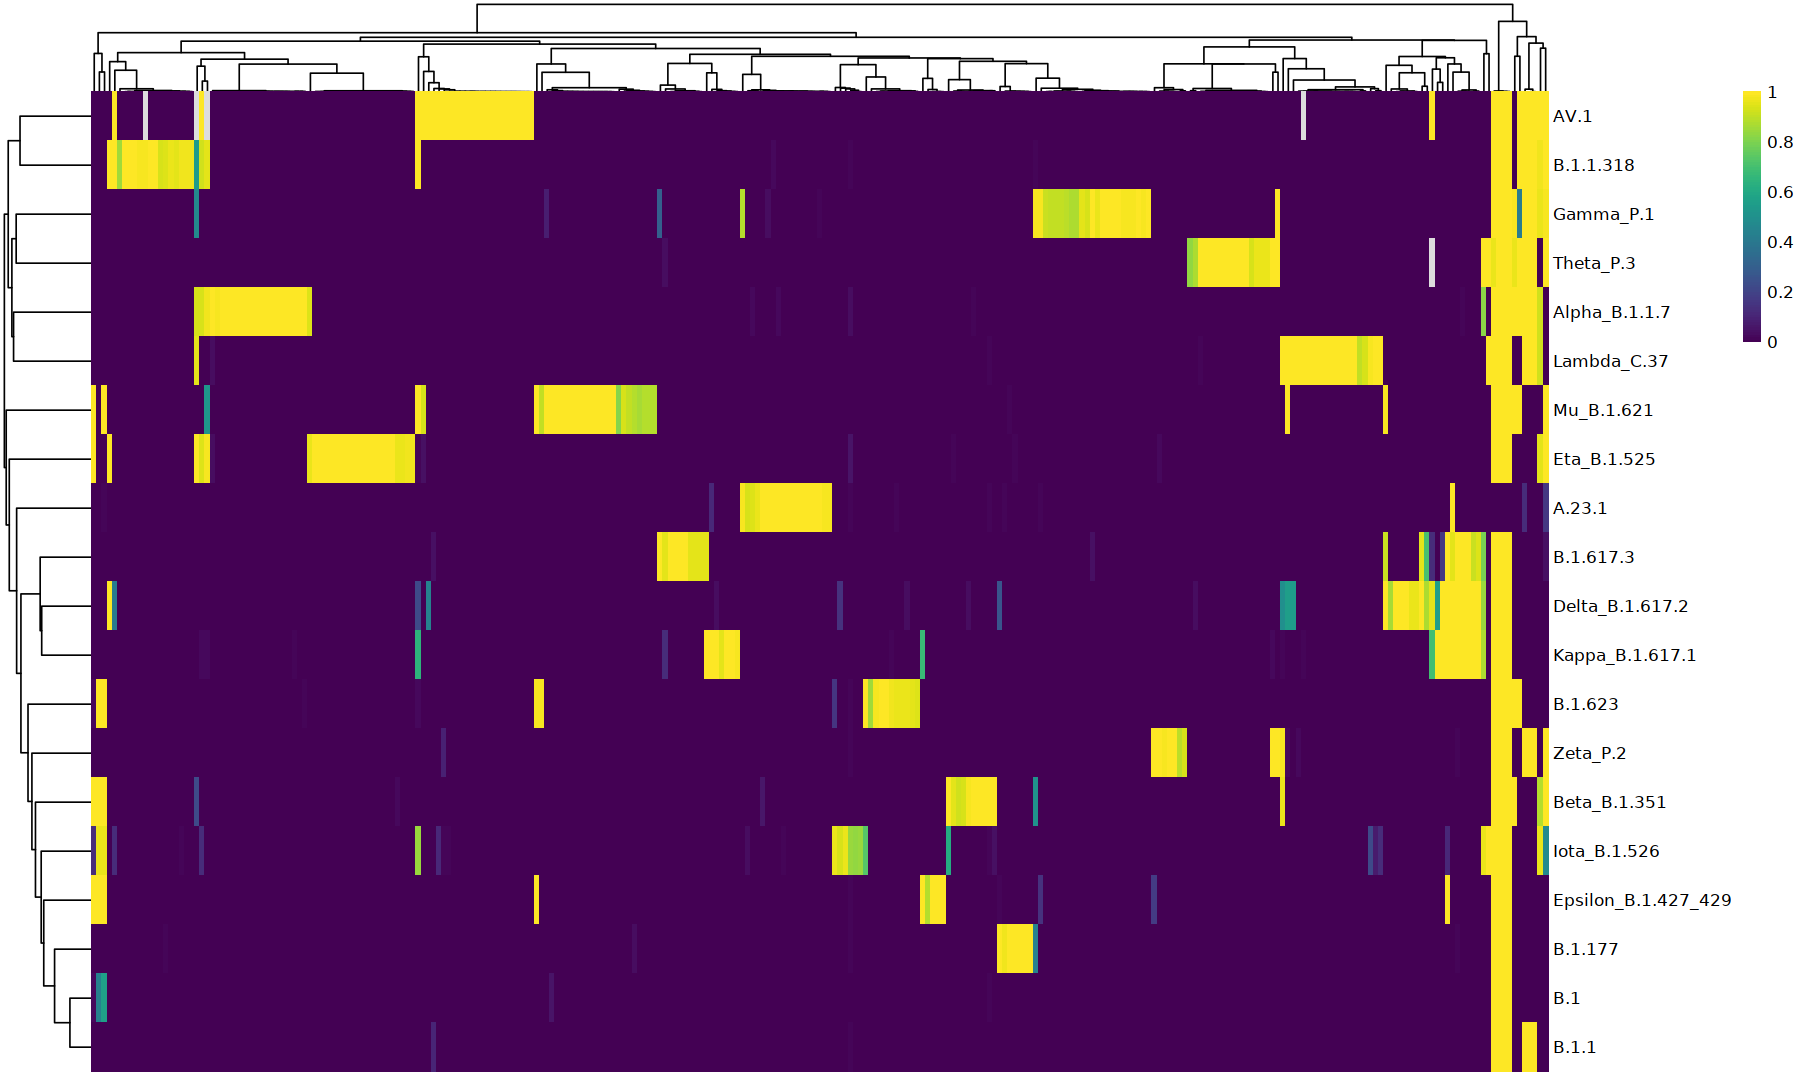

In [3]:
m = filter(markers, mut %in% snp_list) %>% dplyr::select(mut, sample, af) %>% spread(mut, af) %>% column_to_rownames('sample')
pheatmap(m, show_colnames=F, color=viridis(n=100))

## Barplot of sample decompositions with error bars

In [4]:
pools1 = read_tsv("../outputs/decompose/oregon.out", col_types="")
pools2 = read_tsv("../outputs/decompose/india.out", col_types="")

head(pools1)

sample,variant_group,proportion,mean,std_error
<chr>,<chr>,<dbl>,<dbl>,<dbl>
SRR14351985,A.23.1,2.29256569046066e-03,2.56945526793979e-03,2.28552295710471e-03
SRR14351985,AV.1,0.00000000000000e+00,0.00000000000000e+00,0.00000000000000e+00
SRR14351985,Alpha_B.1.1.7,0.00000000000000e+00,0.00000000000000e+00,0.00000000000000e+00
SRR14351985,B.1,2.62895965351957e-09,9.87285378938411e-09,1.48300461422874e-08
SRR14351985,B.1.1,8.59889279780692e-02,8.42006047844065e-02,2.80509787618114e-02
SRR14351985,B.1.1.318,6.01422532623414e-03,6.35289152587128e-03,5.33482470457630e-03


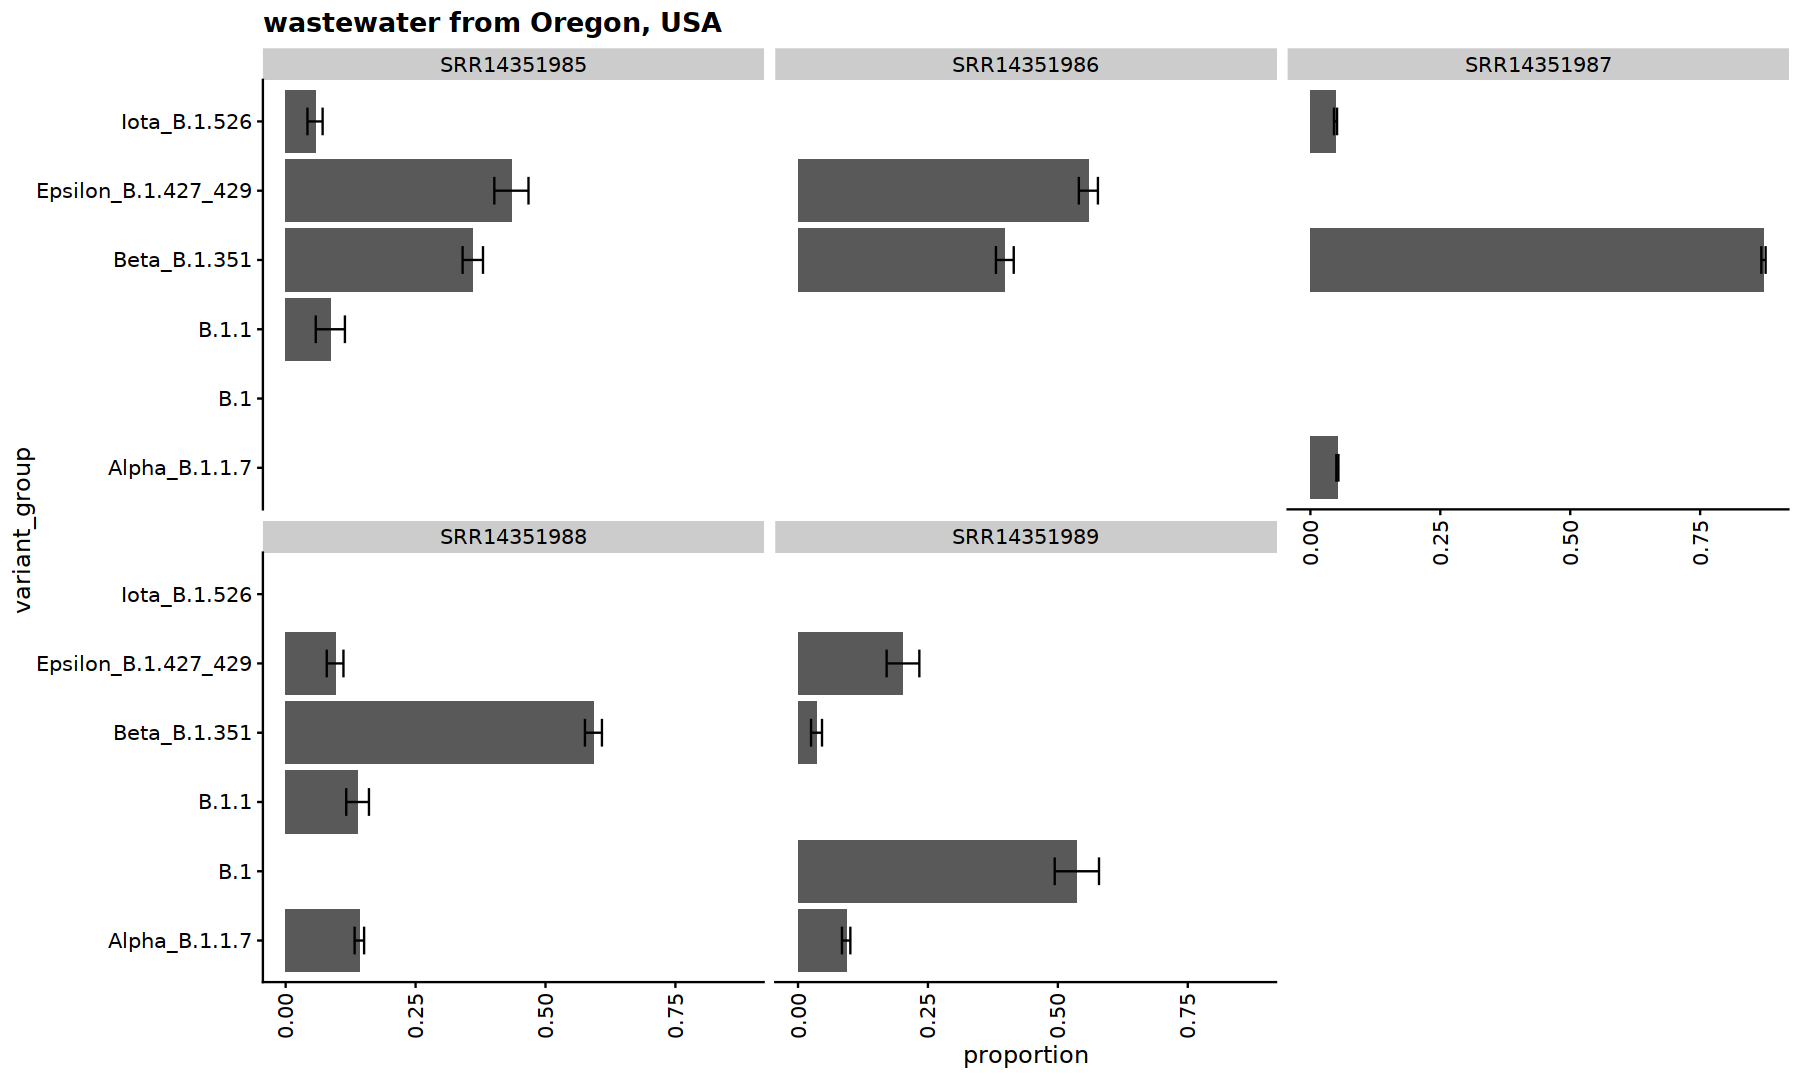

In [5]:
filter(pools1, proportion>=0.03) %>% ggplot(aes(y=variant_group, x=proportion)) + geom_col(position='dodge') + 
geom_errorbarh(height=0.4,aes(xmin=proportion-std_error, xmax=proportion+std_error)) + facet_wrap(~sample) +
theme(axis.text.x=element_text(angle=90,vjust=.5)) + labs(title="wastewater from Oregon, USA")

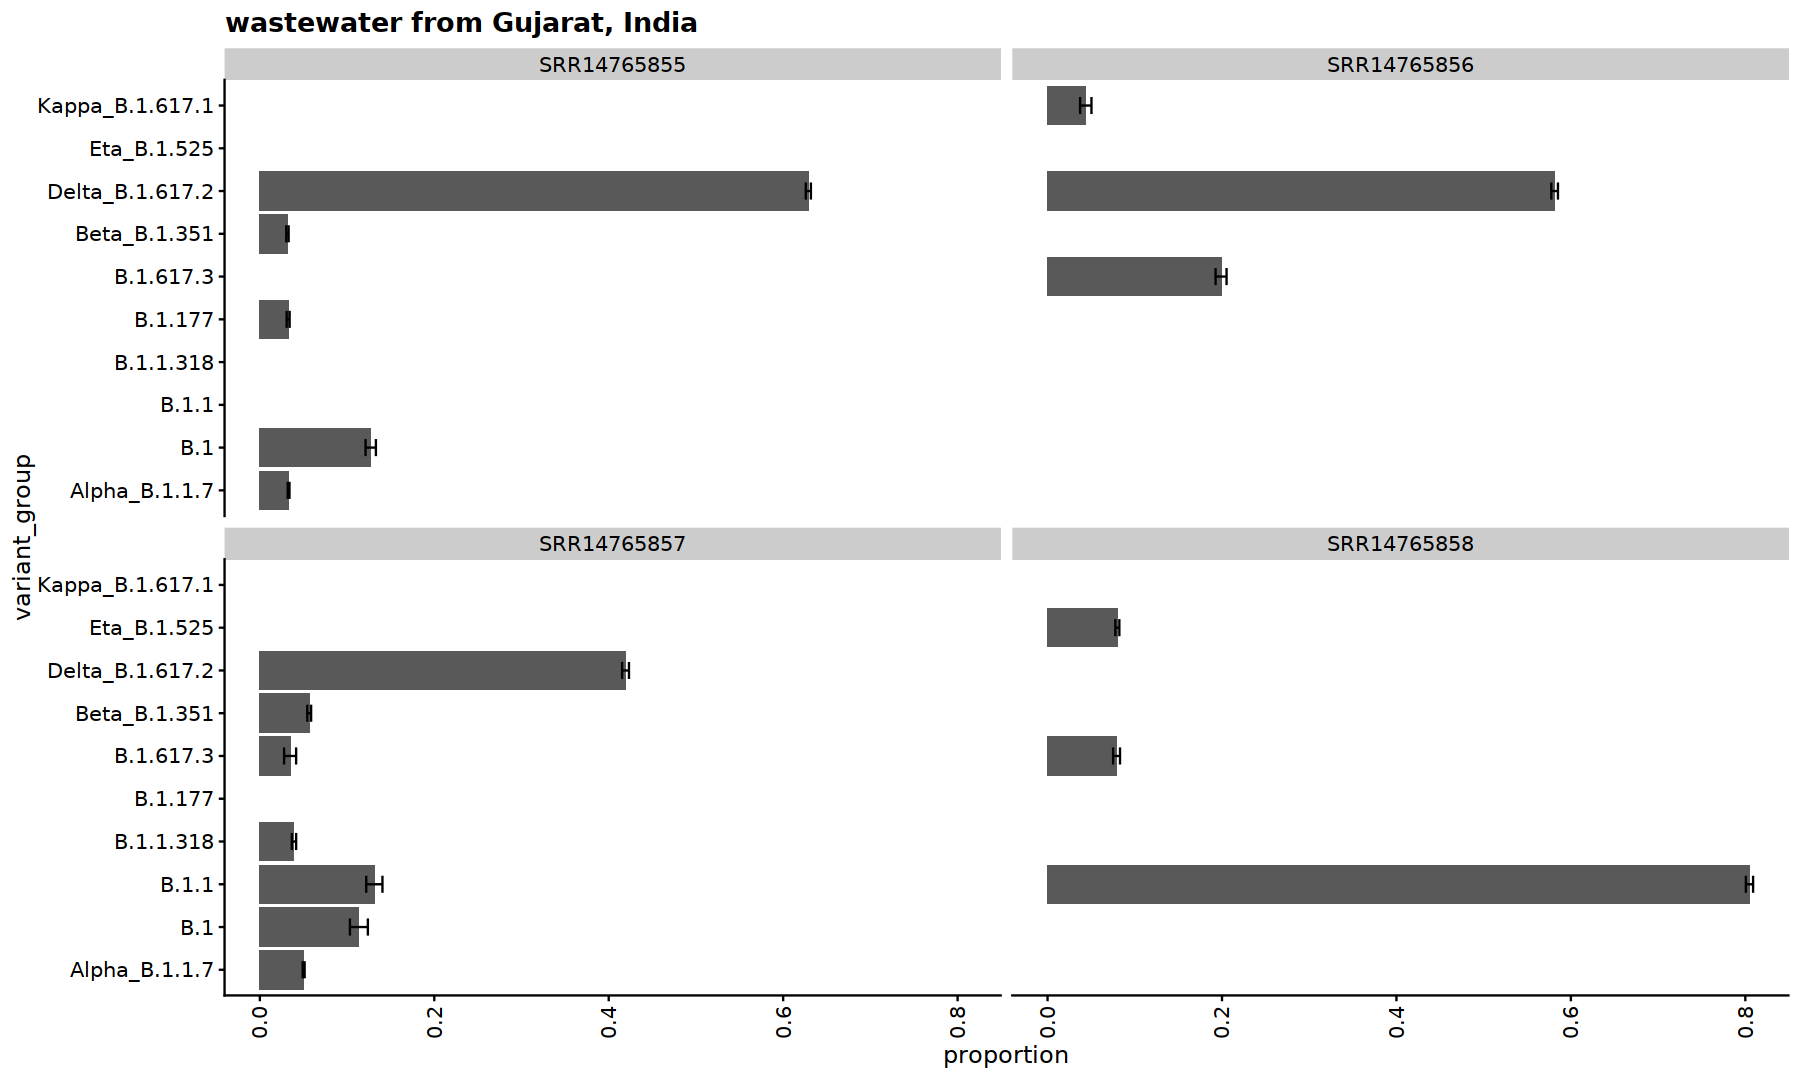

In [6]:
filter(pools2, proportion>=0.03) %>% ggplot(aes(y=variant_group, x=proportion)) + geom_col(position='dodge') + 
geom_errorbarh(height=0.4,aes(xmin=proportion-std_error, xmax=proportion+std_error)) + facet_wrap(~sample) +
theme(axis.text.x=element_text(angle=90,vjust=.5)) + labs(title="wastewater from Gujarat, India")

## Heatmap of pooled sample mutations 

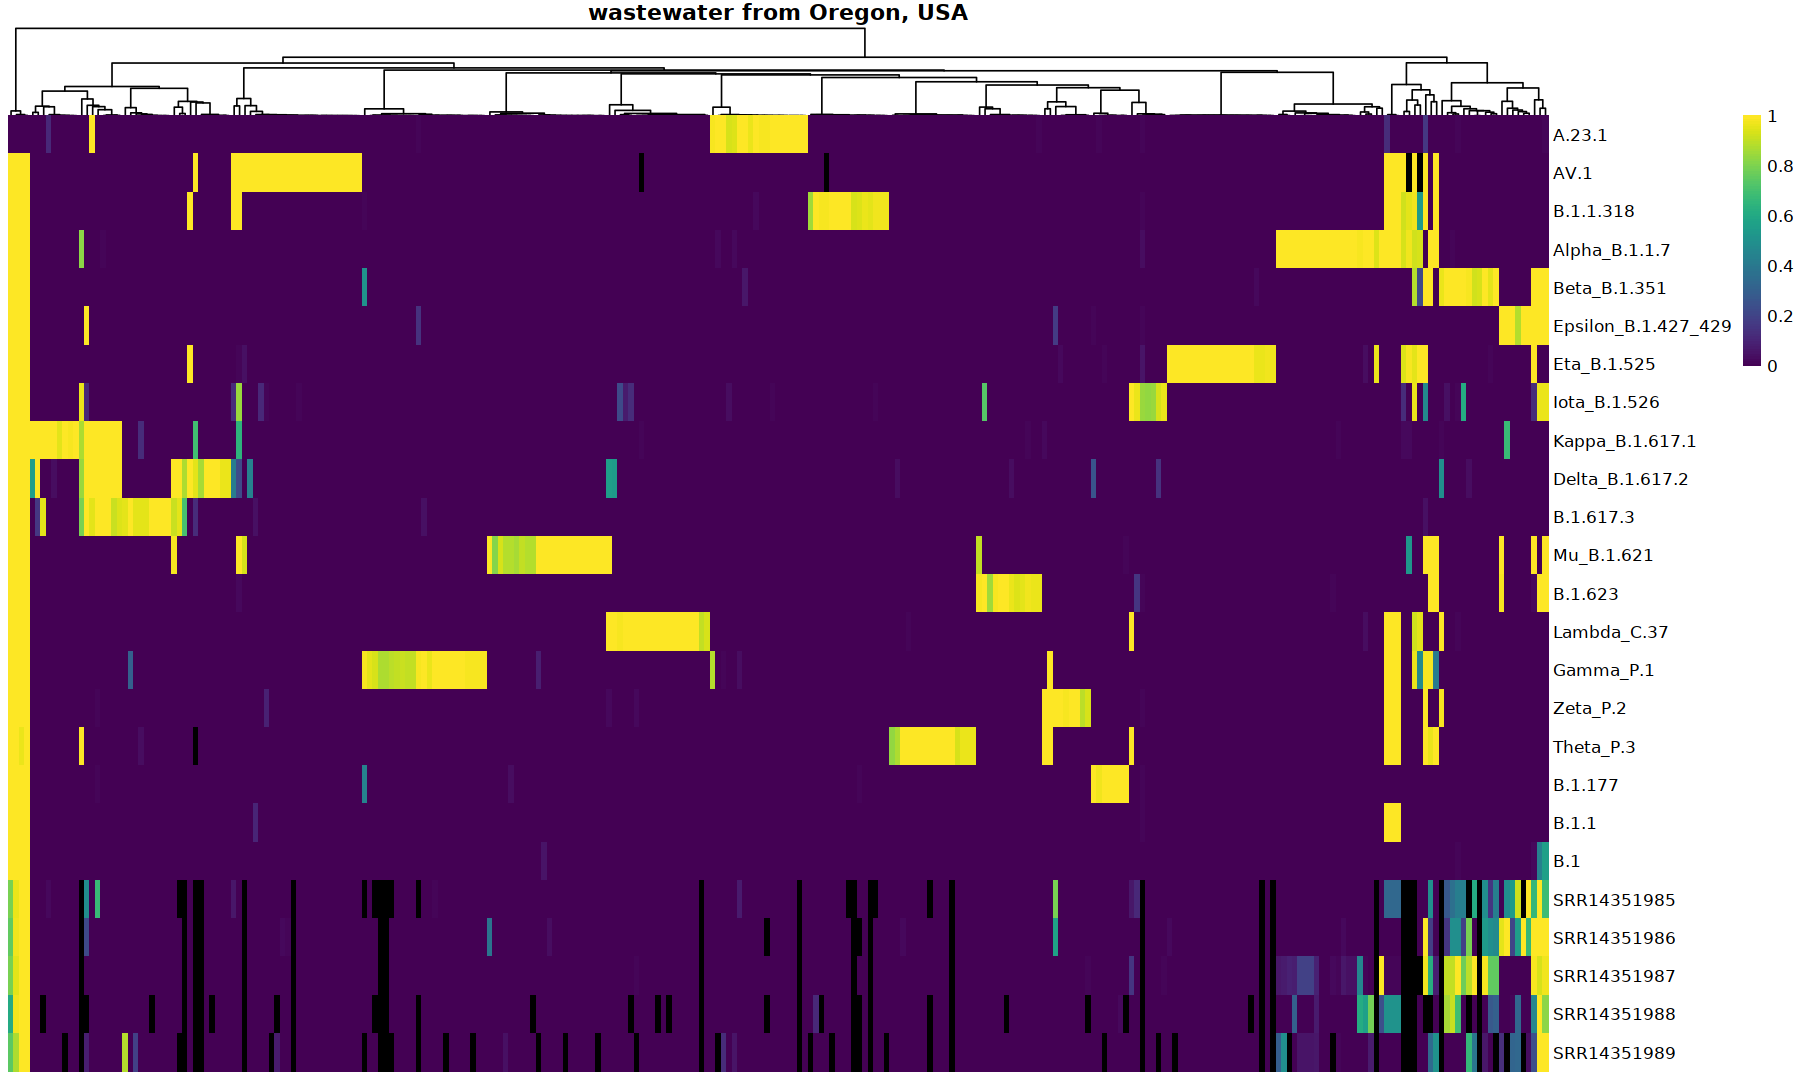

In [7]:
pools1_muts = read_tsv("../outputs/variants_table/pool_samples_oregon.tsv", col_types="")
pools1_muts = mutate(pools1_muts, af=adalt/dp, mut=paste0(pos,':',ref,'>',alt))

bind_rows(markers,pools1_muts) %>%
filter(mut %in% snp_list) %>% pivot_wider(id_cols=sample, names_from=mut, values_from=af) %>% column_to_rownames('sample') %>% 
pheatmap(cluster_rows=F, show_colnames=F, color=viridis(n=100), 
         na_col='black', clustering_method = 'ward.D2', show_rownames=T, cluster_cols=T, main="wastewater from Oregon, USA")

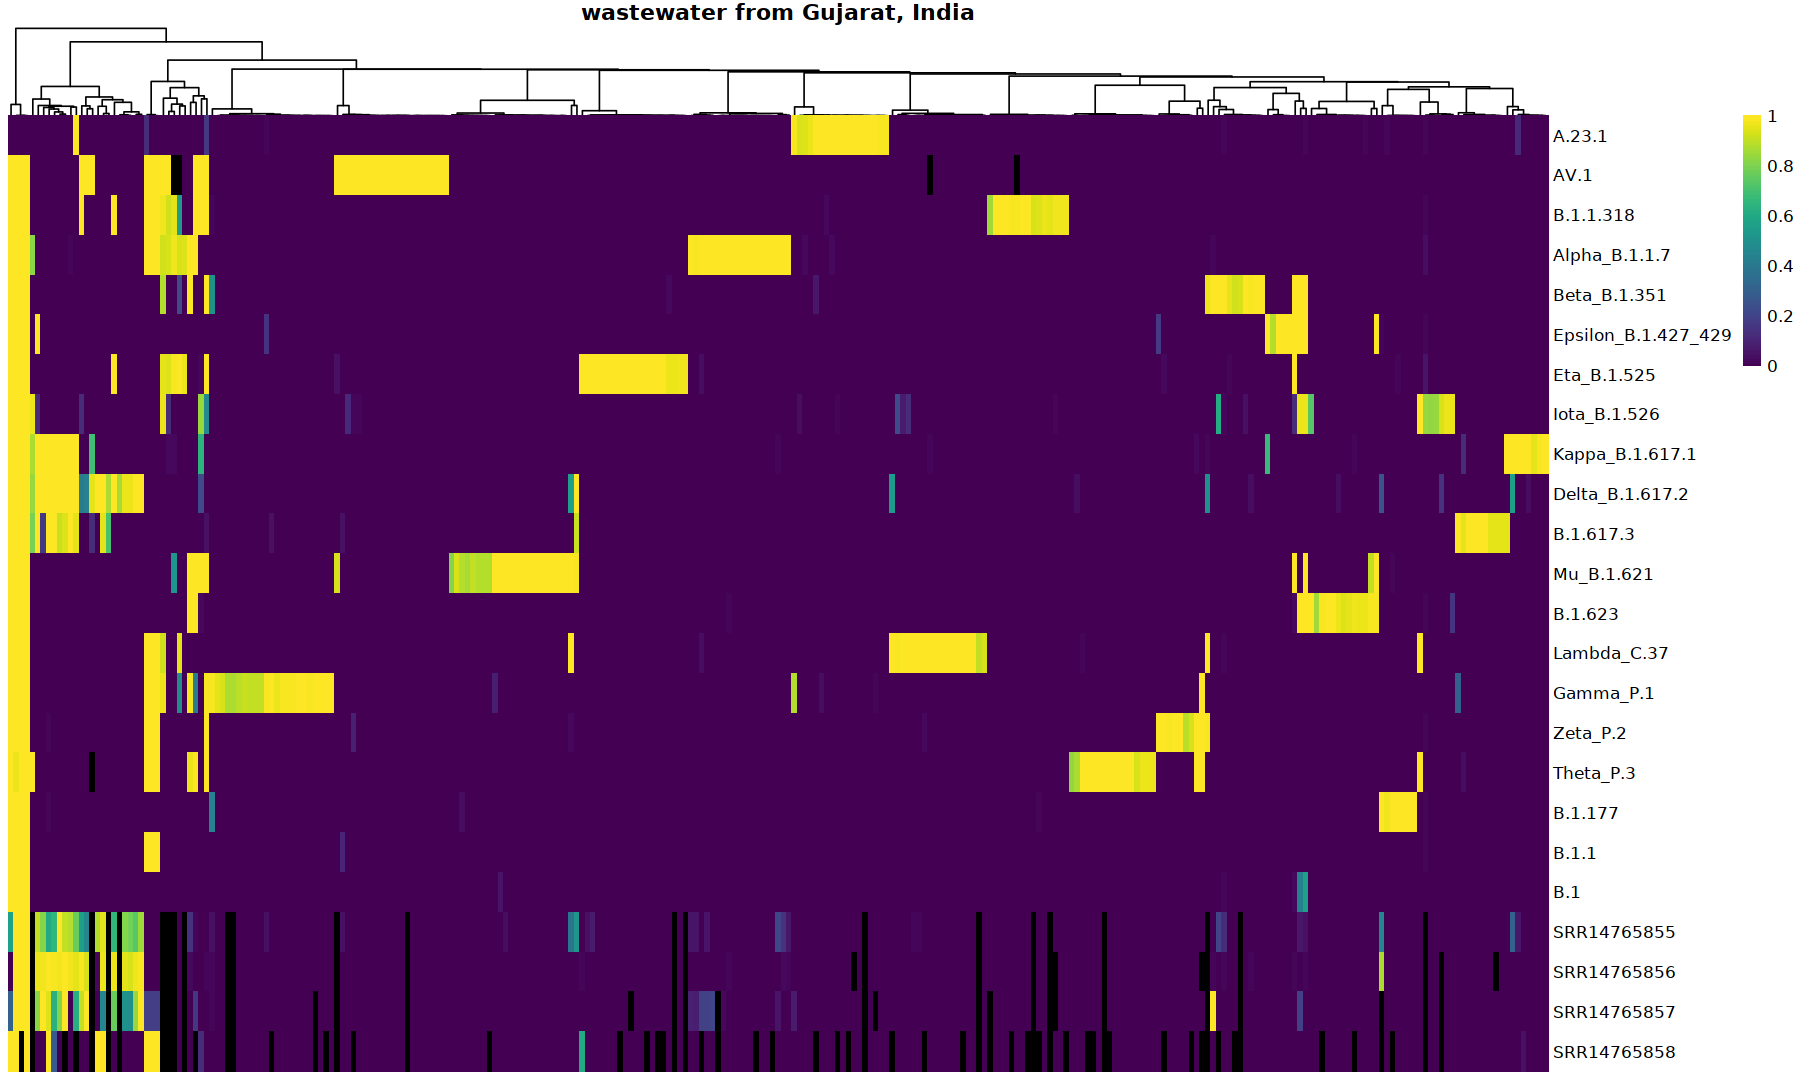

In [8]:
pools2_muts = read_tsv("../outputs/variants_table/pool_samples_india.tsv", col_types="")
pools2_muts = mutate(pools2_muts, af=adalt/dp, mut=paste0(pos,':',ref,'>',alt))

bind_rows(markers,pools2_muts) %>%
filter(mut %in% snp_list) %>% pivot_wider(id_cols=sample, names_from=mut, values_from=af) %>% column_to_rownames('sample') %>% 
pheatmap(cluster_rows=F, show_colnames=F, color=viridis(n=100), 
         na_col='black', clustering_method = 'ward.D2', show_rownames=T, cluster_cols=T, main="wastewater from Gujarat, India")